<a href = 'https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html' style = 'font-size:30px'>Scipy Tutorial</a>

In [1]:
from scipy import misc, ndimage
import matplotlib.pyplot as plt
import numpy as np

# Geometry Transformations

The <b>misc</b> package in SciPy comes with some images. We use those images to learn the image manipulations. Let us consider the following example.

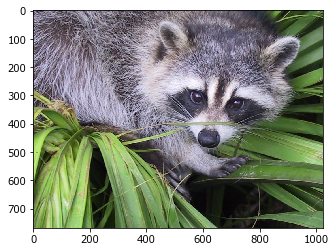

In [2]:
face = misc.face()
plt.imshow(face)

Flip image up side down: <code><b>np.flipud()</b></code>

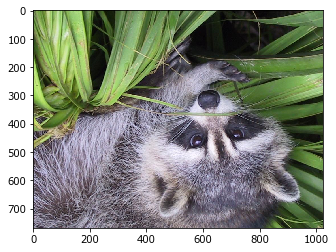

In [3]:
flipud = np.flipud(face)
plt.imshow(flipud)

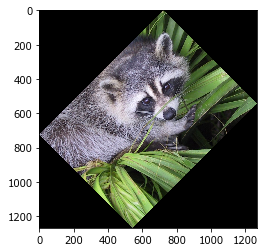

In [4]:
#rotate image
rotate = ndimage.rotate(face, 45)
plt.imshow(rotate)

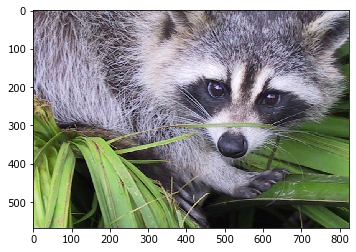

In [14]:
#crop image
plt.imshow(face[100:-100, 100:-100])

# Properties shared by all functions

<code><b>output</b></code>: array or dtype, optional<br>
    The array in which to place the output, or the dtype of the
    returned array. <br>By default an array of the same dtype as input
    will be created.

In [5]:
ndimage.correlate1d([1,2,3,4], [1,1,1], output = 'float')

array([ 4.,  6.,  9., 11.])

In [6]:

ndimage.convolve1d([1,2,3,4], [1,1,1])

array([ 4,  6,  9, 11])

# Filter Functions

## Correlation and Convolution

* The **`correlate1d`** function calculates a 1-D correlation along the given axis. The lines of the array along the given axis are correlated with the given weights. The weights parameter must be a 1-D sequence of numbers.

* The function **`correlate`** implements multidimensional correlation of the input array with a given kernel.

* The **`convolve1d`** function calculates a 1-D convolution along the given axis. The lines of the array along the given axis are convoluted with the given weights. The weights parameter must be a 1-D sequence of numbers.

* The function **`convolve`** implements multidimensional convolution of the input array with a given kernel.

<p style = 'color:red;font-weight: bold'>Note
    A <code>convolution</code> is essentially a <code>correlation</code> after mirroring the kernel. As a result, the origin parameter behaves differently than in the case of a correlation: the results is shifted in the opposite direction.</p>

1D convolution: <code><b>ndimage.convolve1d</b></code>

```python
ndimage.convolve1d(
    input,
    weights,
    axis=-1,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0,
)
```

**`origin`** parameter, which gives the origin of the filter relative to its center.

for the usage of **`mode`**, refer the the tutorial document

In [7]:
Signal = np.arange(10)
Signal

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
Filter = np.array([1,1,1])
Filter

array([1, 1, 1])

In [9]:
#initially, the center of the filter is placed at index 0
ndimage.convolve1d(Signal, Filter)

array([ 1,  3,  6,  9, 12, 15, 18, 21, 24, 26])

In [10]:
#let's place the center of the filter starting at index 1
ndimage.convolve1d(Signal, Filter, origin = 1)

array([ 3,  6,  9, 12, 15, 18, 21, 24, 26, 26])

<hr>

1D correlation: <code><b>ndimage.correlate1d</b></code>

```python
ndimage.correlate1d(
    input,
    weights,
    axis=-1,
    output=None,
    mode='reflect',
    cval=0.0,
    origin=0,
)
```

In [11]:
ndimage.correlate1d(Signal, Filter)

array([ 1,  3,  6,  9, 12, 15, 18, 21, 24, 26])

## Smoothing Filters

The **`gaussian_filter1d`** function implements a 1-D Gaussian filter. The standard deviation of the Gaussian filter is passed through the parameter sigma. Setting order = 0 corresponds to convolution with a Gaussian kernel. An order of 1, 2, or 3 corresponds to convolution with the first, second, or third derivatives of a Gaussian. Higher-order derivatives are not implemented.

```python
ndimage.gaussian_filter1d(
    input,
    sigma,
    axis=-1,
    order=0,
    output=None,
    mode='reflect',
    cval=0.0,
    truncate=4.0,
)
```

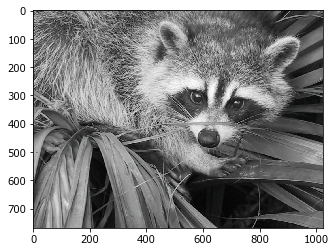

In [12]:
#gaussian filter
plt.imshow(ndimage.gaussian_filter1d(face, sigma = 100))

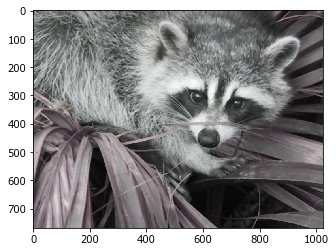

In [24]:
#median filter
plt.imshow(ndimage.median_filter(face, size = 5))

# Connected components and measurements on images

Let us first generate a nice synthetic binary image.

Text(0.5, 1.0, 'mask')

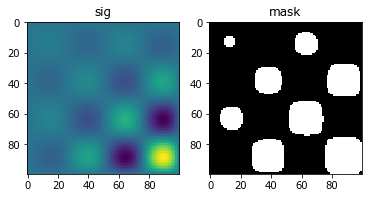

In [25]:
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

fig,axes = plt.subplots(1,2)
axes[0].imshow(sig)
axes[0].set_title('sig')

axes[1].imshow(mask, cmap = 'binary_r')
axes[1].set_title('mask')

**`scipy.ndimage.label()`** assigns a different label to each connected component:

```python
ndimage.label(input, structure=None, output=None)
--------
Docstrings:
label features in an array
```

In [28]:
np.info(ndimage.label)

 label(input, structure=None, output=None)

Label features in an array.

Parameters
----------
input : array_like
    An array-like object to be labeled.  Any non-zero values in `input` are
    counted as features and zero values are considered the background.
structure : array_like, optional
    A structuring element that defines feature connections.
    `structure` must be symmetric.  If no structuring element is provided,
    one is automatically generated with a squared connectivity equal to
    one.  That is, for a 2-D `input` array, the default structuring element
    is::

        [[0,1,0],
         [1,1,1],
         [0,1,0]]

output : (None, data-type, array_like), optional
    If `output` is a data type, it specifies the type of the resulting
    labeled feature array
    If `output` is an array-like object, then `output` will be updated
    with the labeled features from this function.  This function can
    operate in-place, by passing output=input.
    Note that the output 

In [32]:
label, num_feature = ndimage.label(mask)
num_feature

8

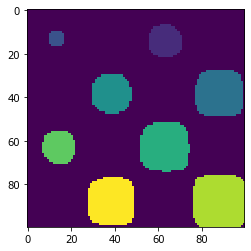

In [33]:
plt.imshow(label)